In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import corner.corner

from impulse.sampler import MHSampler
from impulse.proposals import AMProposal, SCAMProposal, DEProposal, ProposalMix
from impulse.impulse import sample

# from schwimmbad import MultiPool
from multiprocessing import Pool


# test model things:
from test_model import make_sin_data, LnLikelihood, LnPrior

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
x, data, omega_real, a_real, phi_real = make_sin_data(1000)
print(omega_real, a_real, phi_real)

1.4821884903520153 3.1825571064270592 1.3665724964593933


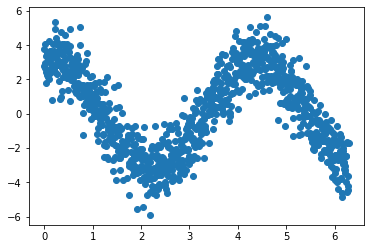

In [6]:
plt.scatter(x, data)

In [7]:
like = LnLikelihood(x, data)
prior = LnPrior([0, 0, 0], [3, 5, 2 * np.pi])

def post(x):
    return like(x) + prior(x)

In [8]:
x0 = prior.initial_sample()
ndim = len(x0)

In [9]:
chain = sample(post, ndim, x0)

100%|██████████| 99/99 [00:07<00:00, 12.91it/s]


In [10]:
burn = int(0.25 * chain.shape[0])
omega = np.median(chain[burn:,0])
a = np.median(chain[burn:,1])
phi = np.median(chain[burn:, 2])

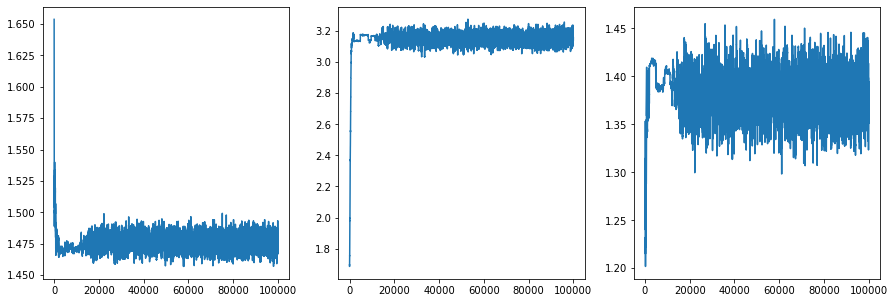

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(chain[:, 0])
ax[1].plot(chain[:, 1])
ax[2].plot(chain[:, 2])
plt.show()

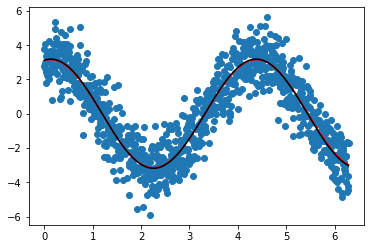

In [12]:
plt.scatter(x, data)
plt.plot(x, a * np.sin(omega * x + phi), color='red')
plt.plot(x, a_real * np.sin(omega_real * x + phi_real), color='black')

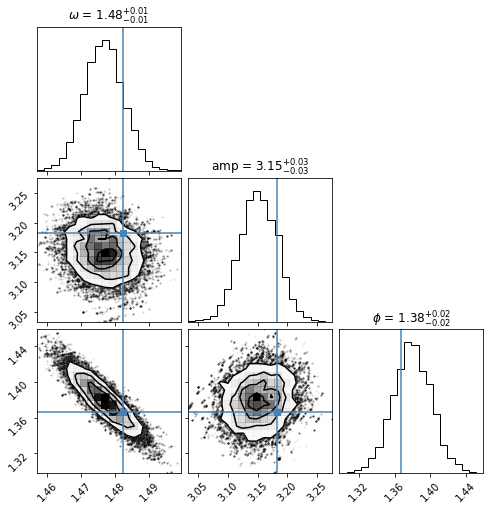

In [13]:
corner.corner(chain[burn:], truths=[omega_real, a_real, phi_real],
              titles=[r'$\omega$', r'amp', r'$\phi$'], show_titles=True)
plt.show()

In [14]:
print(omega_real, a_real, phi_real)
print(omega, a, phi)

1.4821884903520153 3.1825571064270592 1.3665724964593933
1.47653296207018 3.1512632615418297 1.379322879988643
